In [1]:
import docx
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Download NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Function to read DOCX file
def read_docx(file_path):
    doc = docx.Document(file_path)
    return ' '.join([para.text for para in doc.paragraphs])

In [4]:
# Function for preprocessing text
def preprocessing_text(text):
    sentences = nltk.sent_tokenize(text)
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    
    stop_words = set(stopwords.words('english'))
    words_without_stopwords = [word for word in words if word.lower() not in stop_words]
    
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in words_without_stopwords]
    
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]
    
    return sentences, words, pos_tags, words_without_stopwords, stemmed, lemmatized

In [5]:
# Function to generate WordCloud
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(" ".join(words))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

In [6]:
# Document file paths
doc_files = [
    r"D:\dsbsa\college\doc1.docx",
    r"D:\dsbsa\college\doc2.docx",
    r"D:\dsbsa\college\doc3.docx",
    r"D:\dsbsa\college\doc4.docx",
    r"D:\dsbsa\college\doc5.docx"
]

# Create lists to collect DataFrame info
doc_names = []
total_words_list = []
unique_words_list = []
processed_docs = []  # For TF-IDF


 Document 1: doc1.docx

 Lemmatized Words (61):
['sudo', 'ssh', 'servic', 'start', 'ssh', 'localhost', 'su', '-hadoop', 'password', './stop-all.sh'] ...


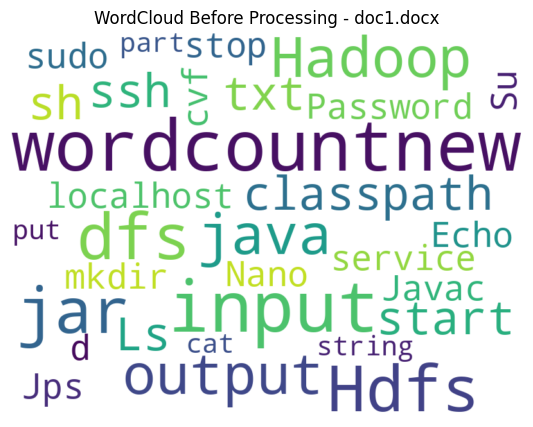

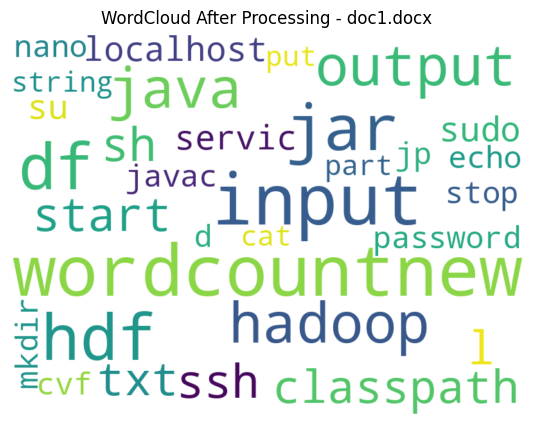


 Document 2: doc2.docx

 Lemmatized Words (62):
['crop', 'manag', 'techniqu', 'effect', 'crop', 'manag', 'techniqu', 'essenti', 'maxim', 'agricultur'] ...


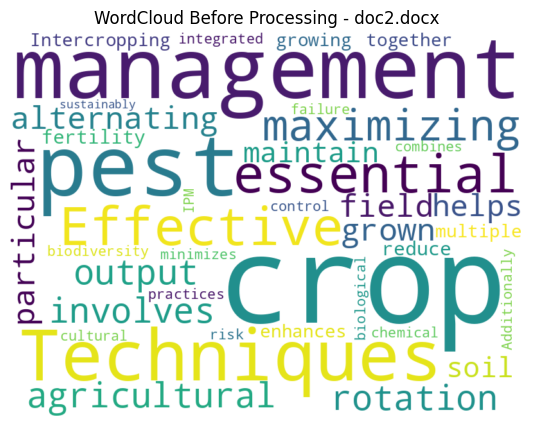

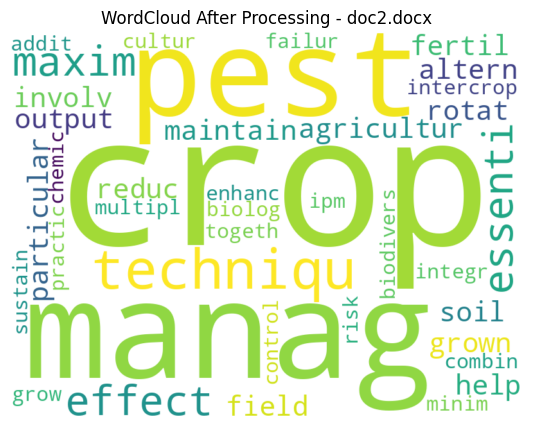


 Document 3: doc3.docx

 Lemmatized Words (55):
['sustain', 'farm', 'sustain', 'farm', 'practic', 'aim', 'meet', 'current', 'food', 'need'] ...


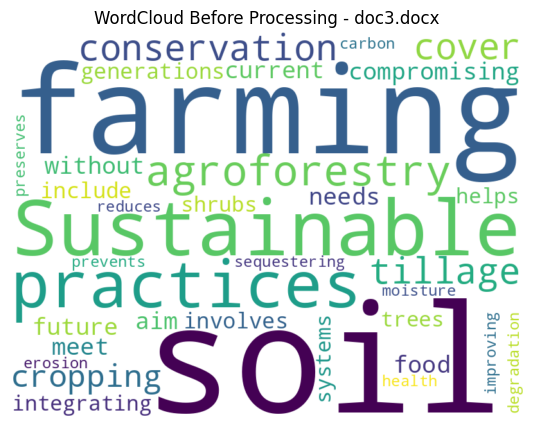

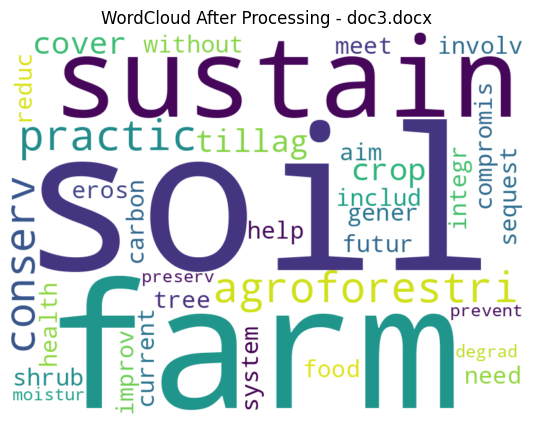


 Document 4: doc4.docx

 Lemmatized Words (50):
['organ', 'farm', 'organ', 'farm', 'method', 'reli', 'natur', 'process', 'rather', 'synthet'] ...


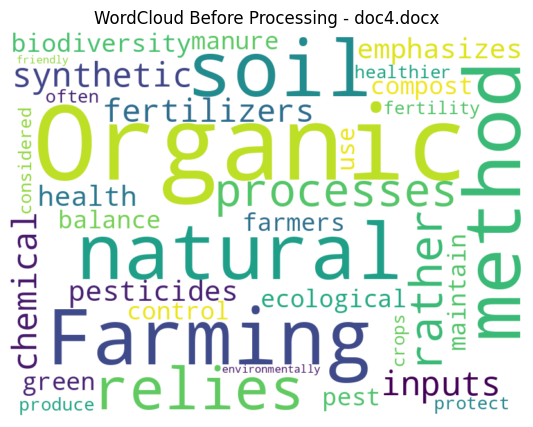

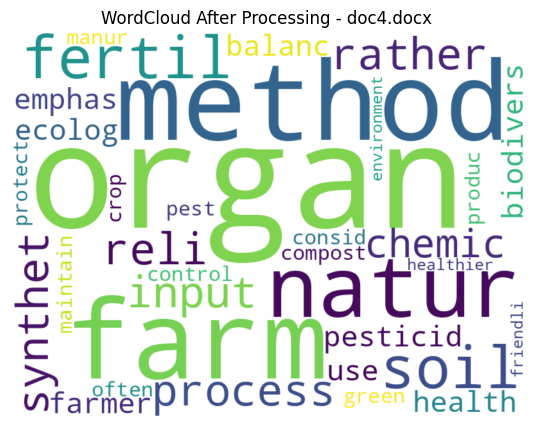


 Document 5: doc5.docx

 Lemmatized Words (65):
['climat', 'impact', 'agricultur', 'climat', 'chang', 'pose', 'signific', 'challeng', 'agricultur', '.'] ...


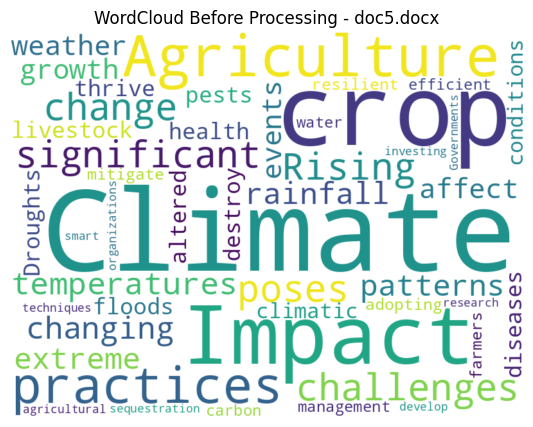

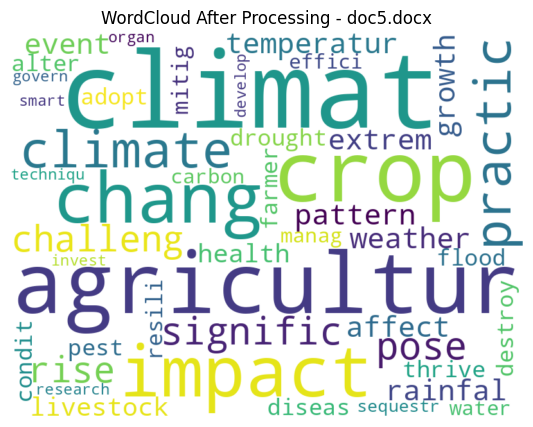

In [7]:
# Processing each document
for idx, file_path in enumerate(doc_files, 1):
    doc_name = file_path.split("\\")[-1]  # Get only the file name
    
    print(f"\n Document {idx}: {doc_name}")
    print("="*80)
    
    text = read_docx(file_path)
    sentences, words, pos_tags, words_without_stopwords, stemmed, lemmatized = preprocessing_text(text)
    
    # Preprocessing Prints (optional)
    print(f"\n Lemmatized Words ({len(lemmatized)}):")
    print(lemmatized[:10], "...")
    
    # WordClouds
    generate_wordcloud(words, f"WordCloud Before Processing - {doc_name}")
    generate_wordcloud(lemmatized, f"WordCloud After Processing - {doc_name}")
    
    # Collecting stats
    total_words = len(lemmatized)
    unique_words = len(set(lemmatized))
    
    doc_names.append(doc_name)
    total_words_list.append(total_words)
    unique_words_list.append(unique_words)
    
    # Save processed text for TF-IDF
    processed_docs.append(" ".join(lemmatized))

In [8]:
# Now create DataFrame
df = pd.DataFrame({
    'Doc Name': doc_names,
    'Total Words': total_words_list,
    'Unique Words': unique_words_list
})

# Display DataFrame
print("\n Document Statistics:")
print(df)


 Document Statistics:
    Doc Name  Total Words  Unique Words
0  doc1.docx           61            44
1  doc2.docx           62            43
2  doc3.docx           55            37
3  doc4.docx           50            36
4  doc5.docx           65            47


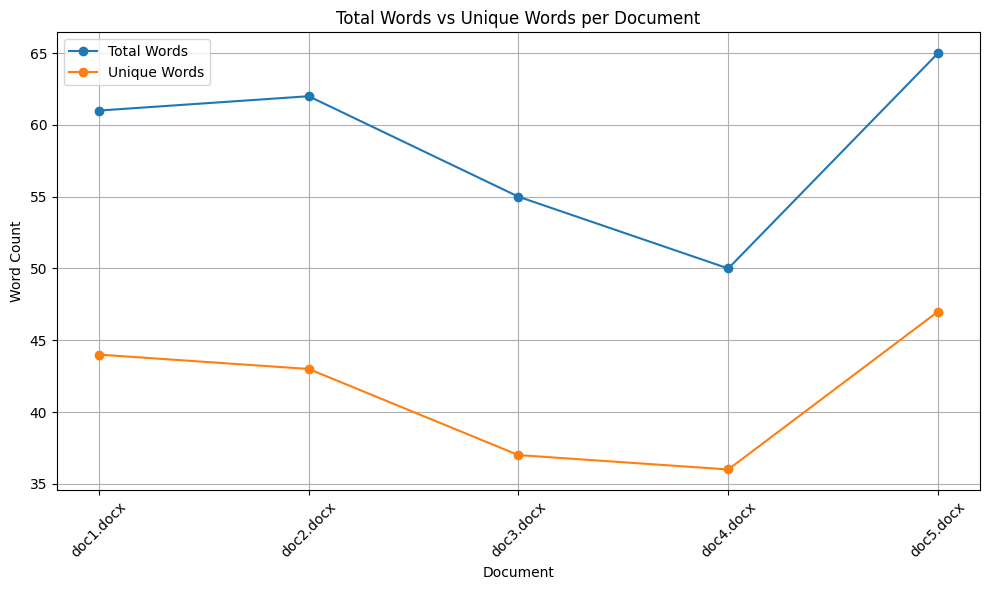

In [9]:
# Plotting Total Words and Unique Words
plt.figure(figsize=(10,6))
plt.plot(df['Doc Name'], df['Total Words'], label='Total Words', marker='o')
plt.plot(df['Doc Name'], df['Unique Words'], label='Unique Words', marker='o')
plt.xlabel('Document')
plt.ylabel('Word Count')
plt.title('Total Words vs Unique Words per Document')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_docs)

# Create a DataFrame for TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=doc_names)

In [11]:
# Display TF-IDF
print("\n TF-IDF Matrix:")
print(tfidf_df)
idf_values = vectorizer.idf_

# Display IDF values for each term
idf_df = pd.DataFrame(idf_values, index=vectorizer.get_feature_names_out(), columns=["IDF"])
idf_df



 TF-IDF Matrix:
              00000     addit     adopt    affect  agricultur  agroforestri  \
doc1.docx  0.080548  0.000000  0.000000  0.000000    0.000000      0.000000   
doc2.docx  0.000000  0.136548  0.000000  0.000000    0.110166      0.000000   
doc3.docx  0.000000  0.000000  0.000000  0.000000    0.000000      0.261701   
doc4.docx  0.000000  0.000000  0.000000  0.000000    0.000000      0.000000   
doc5.docx  0.000000  0.000000  0.121572  0.121572    0.294250      0.000000   

                aim       all      also     alter  ...    thrive    tillag  \
doc1.docx  0.000000  0.161096  0.000000  0.000000  ...  0.000000  0.000000   
doc2.docx  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
doc3.docx  0.130851  0.000000  0.000000  0.000000  ...  0.000000  0.261701   
doc4.docx  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
doc5.docx  0.000000  0.000000  0.121572  0.121572  ...  0.121572  0.000000   

             togeth      tree       txt

,IDF
00000,2.098612
addit,2.098612
adopt,2.098612
affect,2.098612
agricultur,1.693147
...,...
use,2.098612
water,2.098612
weather,2.098612
without,2.098612
